Instala a biblioteca pandas-profiling, que será usada na análise exploratória dos dados.

In [ ]:
!pip install -q --upgrade pandas-profiling

     |████████████████████████████████| 266kB 8.5MB/s 
     |████████████████████████████████| 71kB 5.7MB/s 
     |████████████████████████████████| 71kB 5.5MB/s 
     |████████████████████████████████| 3.1MB 16.8MB/s 
     |████████████████████████████████| 604kB 40.3MB/s 
     |████████████████████████████████| 71kB 6.0MB/s 
     |████████████████████████████████| 296kB 56.1MB/s 


<h2>Importa as bibliotecas necessárias.</h2>

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from pandas.plotting import parallel_coordinates

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {"grid.linestyle":"--"})

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Carrega os dados

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/janael-pinheiro/datasets/master/KaggleV2-May-2016.csv")

In [ ]:
df.head(n=10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [ ]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [ ]:
profile = ProfileReport(df)

In [ ]:
profile.to_notebook_iframe()

#Análise exploratória.

Distribuição das idades para os pacientes que comparecem ou não ao compromisso.

Text(0, 0.5, 'Função de densidade de probabilidade')

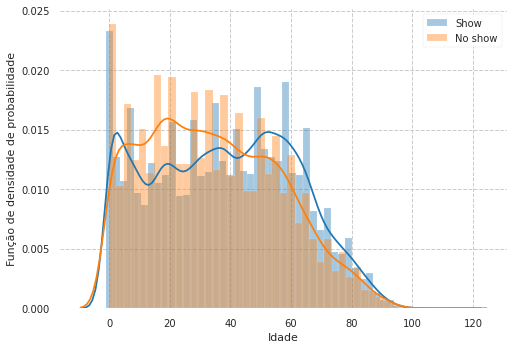

In [ ]:
sns.distplot(df[df["No-show"] == "No"]["Age"], label="Show")
sns.distplot(df[df["No-show"] == "Yes"]["Age"], label="No show")
plt.legend()
plt.xlabel("Idade")
plt.ylabel("Função de densidade de probabilidade")

Agrupa os exemplos por gênero do paciente e 'no-show'.

In [ ]:
gender = df[["Gender","No-show", "PatientId"]].groupby(by=["Gender","No-show"]).count()

In [ ]:
gender

PatientId
Gender No-show           
F      No           57246
       Yes          14594
M      No           30962
       Yes           7725

O gráfico abaixo ilustra a quantidade de pessoas, por gênero, que compareceram ou não ao compromisso.

Text(0, 0.5, 'Genêro')

<Figure size 720x432 with 0 Axes>

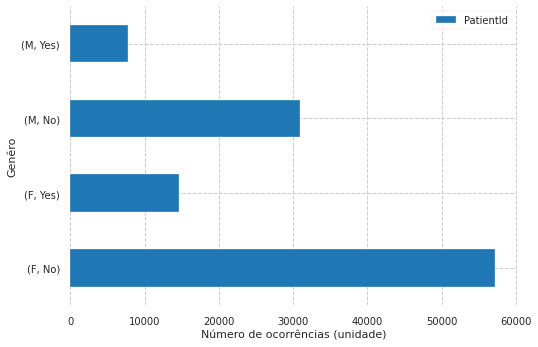

In [ ]:
plt.figure(figsize=(10,6))
gender.plot.barh()
plt.xlabel("Número de ocorrências (unidade)")
plt.ylabel("Genêro")

#Boxplot para apresentar algumas estatísticas descritivas.

O gráfico a seguir apresenta estatísticas para a idade quando ocorreu ou não um 'no-show'.

Text(0.5, 6.79999999999999, 'No-show?')

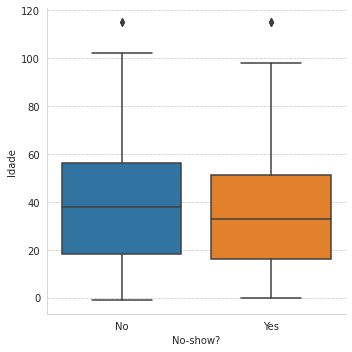

In [ ]:
sns.catplot(x="No-show", y="Age", kind="box", data=df)
plt.ylabel("Idade")
plt.xlabel("No-show?")

#Gráficos de barras

Nos gráficos abaixo, a coluna 'Age' foi utilizada somente para contagem de registros.

<h2>Gênero.</h2>

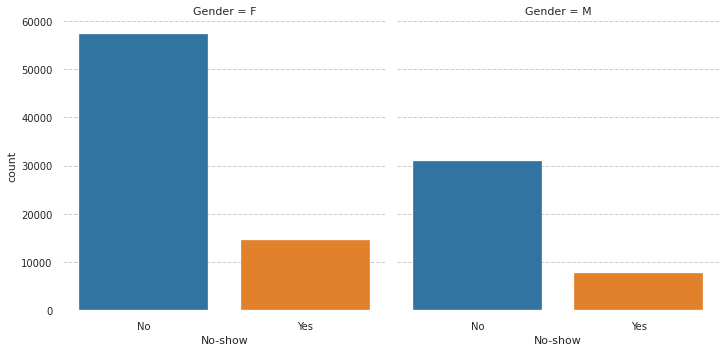

In [ ]:
sns.catplot("No-show", col="Gender", kind="count", data=df)

Text(0, 0.5, 'Gender/No-Show?')

<Figure size 720x432 with 0 Axes>

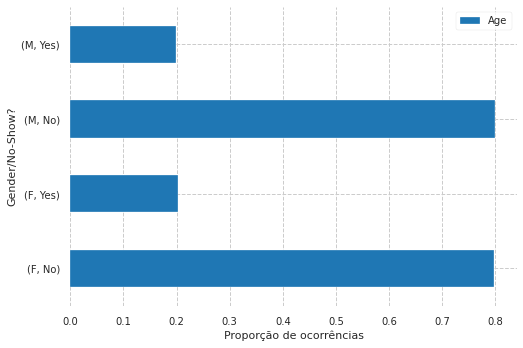

In [ ]:
gender = df[["Gender", "No-show", "Age"]].groupby(by=["Gender","No-show"]).count()/df[["Gender","Age"]].groupby("Gender").count()
plt.figure(figsize=(10,6))
gender.plot.barh()
plt.xlabel("Proporção de ocorrências")
plt.ylabel("Gender/No-Show?")

<h2>Hypertension</h2>

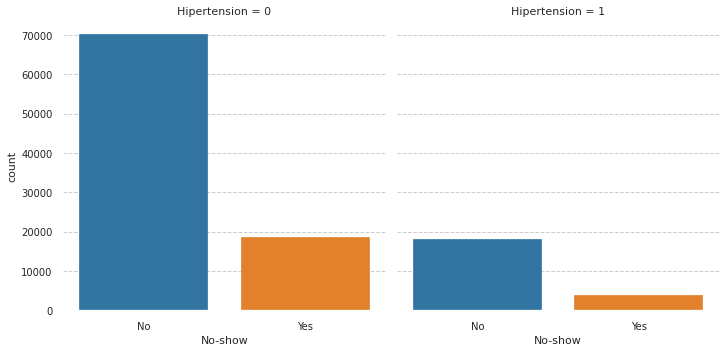

In [ ]:
sns.catplot("No-show", col="Hipertension", kind="count", data=df)

Text(0, 0.5, 'It hypertension?/No-Show?')

<Figure size 720x432 with 0 Axes>

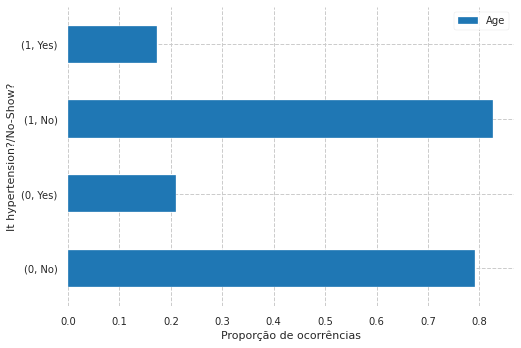

In [ ]:
hipertension = df[["Hipertension", "No-show", "Age"]].groupby(by=["Hipertension","No-show"]).count()/df[["Hipertension","Age"]].groupby("Hipertension").count()
plt.figure(figsize=(10,6))
hipertension.plot.barh()
plt.xlabel("Proporção de ocorrências")
plt.ylabel("Hypertension?/No-Show?")

O gráfico acima sugere que a proporção de 'No-show' sobe quando a pessoa não tem hipertensão.

<h2>Scholarship.</h2>

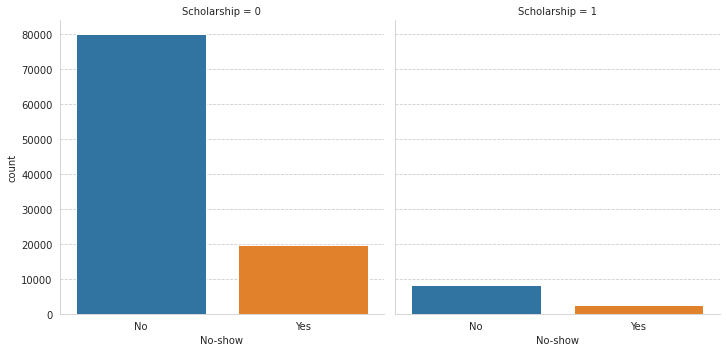

In [ ]:
sns.catplot("No-show", col="Scholarship", kind="count", data=df)

Text(0, 0.5, 'Scholarship/No-Show?')

<Figure size 720x432 with 0 Axes>

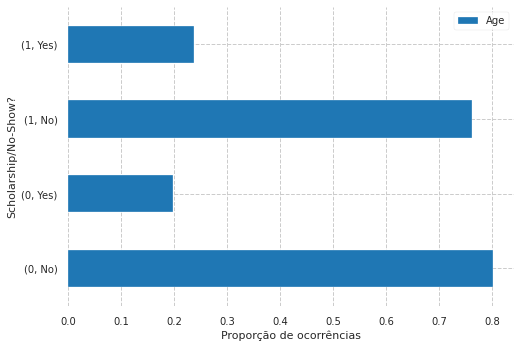

In [ ]:
scholarship = df[["Scholarship", "No-show", "Age"]].groupby(by=["Scholarship","No-show"]).count()/df[["Scholarship","Age"]].groupby("Scholarship").count()
plt.figure(figsize=(10,6))
scholarship.plot.barh()
plt.xlabel("Proporção de ocorrências")
plt.ylabel("Scholarship/No-Show?")

Quando o paciente tem 'scholarship' a proporção de 'No-show' é maior do que quando não tem.

<h2>SMS_received.</h2>

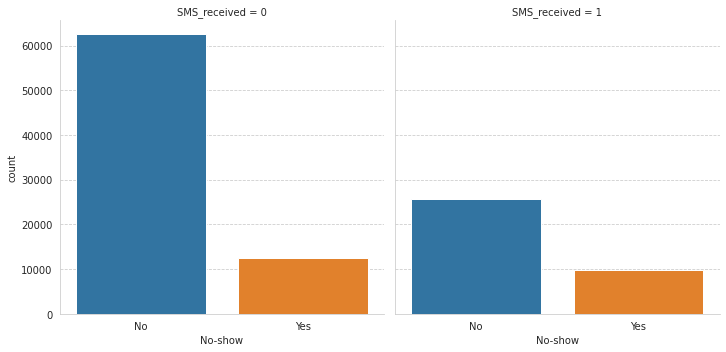

In [ ]:
sns.catplot("No-show", col="SMS_received", kind="count", data=df)

Text(0, 0.5, 'SMS_received/No-Show?')

<Figure size 720x432 with 0 Axes>

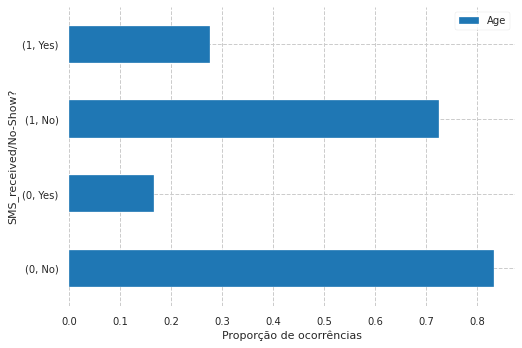

In [ ]:
scholarship = df[["SMS_received", "No-show", "Age"]].groupby(by=["SMS_received","No-show"]).count()/df[["SMS_received","Age"]].groupby("SMS_received").count()
plt.figure(figsize=(10,6))
scholarship.plot.barh()
plt.xlabel("Proporção de ocorrências")
plt.ylabel("SMS_received/No-Show?")

Segundo o gráfico acima, curiosamente, a proporção de pacientes que não apareceram é maior quando o mesmo recebeu um SMS.

#Limpeza dos dados

Verifica a ocorrência de valores ausentes.

In [ ]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
handicap          0
SMS_received      0
No-show           0
dtype: int64

Existem valores duplicados?

In [ ]:
df.duplicated().sum()

0

Corrige os nomes de algumas colunas.

In [ ]:
df.rename(columns={"Hipertension":"Hypertension", "Handcap":"handicap"}, inplace=True)

#Valores incorretos?

In [ ]:
for col in df.columns:
  print("Valores da coluna {0}: {1}.".format(col,df[col].unique()))

Valores da coluna PatientId: [2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13].
Valores da coluna AppointmentID: [5642903 5642503 5642549 ... 5630692 5630323 5629448].
Valores da coluna Gender: ['F' 'M'].
Valores da coluna ScheduledDay: <DatetimeArray>
['2016-04-29 18:38:08+00:00', '2016-04-29 16:08:27+00:00',
 '2016-04-29 16:19:04+00:00', '2016-04-29 17:29:31+00:00',
 '2016-04-29 16:07:23+00:00', '2016-04-27 08:36:51+00:00',
 '2016-04-27 15:05:12+00:00', '2016-04-27 15:39:58+00:00',
 '2016-04-29 08:02:16+00:00', '2016-04-27 12:48:25+00:00',
 ...
 '2016-06-07 07:45:16+00:00', '2016-06-07 07:38:34+00:00',
 '2016-04-27 15:15:06+00:00', '2016-05-03 07:51:47+00:00',
 '2016-05-03 08:23:40+00:00', '2016-05-03 09:15:35+00:00',
 '2016-05-03 07:27:33+00:00', '2016-04-27 16:03:52+00:00',
 '2016-04-27 15:09:23+00:00', '2016-04-27 13:30:56+00:00']
Length: 103549, dtype: datetime64[ns, UTC].
Valores da coluna AppointmentDay: <DatetimeArray>
['2016-04-2

#Idade negativa?

In [ ]:
df[df["Age"] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


#Idade igual a zero?

Talvez os valores zero na coluna "Age" representem uma idade inferior a um ano, como crianças que ainda têm alguns meses de vida.

In [ ]:
df[df["Age"] == 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,handicap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29 08:08:43+00:00,2016-04-29 00:00:00+00:00,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27 10:46:12+00:00,2016-04-29 00:00:00+00:00,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25 13:28:21+00:00,2016-04-29 00:00:00+00:00,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27 10:48:50+00:00,2016-04-29 00:00:00+00:00,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29 08:53:02+00:00,2016-04-29 00:00:00+00:00,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16 12:30:58+00:00,2016-06-01 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06 14:22:34+00:00,2016-06-08 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03 15:18:44+00:00,2016-06-03 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03 08:56:51+00:00,2016-06-03 00:00:00+00:00,0,RESISTÊNCIA,0,0,0,0,0,0,No


<h2>Cria novas features</h2>

Converte as colunas que contêm datas para o formato de datetime.


In [ ]:
df["ScheduledDay"] = df["ScheduledDay"].apply(lambda x: pd.to_datetime(x))

In [ ]:
df["AppointmentDay"] = df["AppointmentDay"].apply(lambda x: pd.to_datetime(x))

O tempo de espera até o dia do compromisso por influenciar a decisão sobre comparecer ou não. Esse tempo de espera foi computado em dias. 

In [ ]:
df["daysUntilAppointment"] = (df["AppointmentDay"] - df["ScheduledDay"]).dt.days

O dia da semana, como Segunda-feira, Terça-feira ou Quarta-feira, pode ter alguma relação com o comparecimento ou não ao compromisso marcado. O dia da semana foi representado por valores numéricos, entre 0 e 6, iniciado na Segunda-feira. Cogitei aplicar uma one-hot encoding nesse atributo, mas desisti porque os valores são ordinais, visto que um dia da semana pode ser considerado maior que outro. Por exemplo, Quarta-feira ser maior que Terça-feira.

In [ ]:
df["weekday"] = df["AppointmentDay"].dt.weekday

#Remoção de outliers e valores incorretos

Com base no boxplot para idade apresentado anteriormente, estou assumindo que idades superiores a 100 anos são outliers. Por sua vez, uma idade negativa não existe. Portanto, registros com valores negativos para a idade estão incorretos.

In [ ]:
df.drop(df[df["Age"] > 100].index, axis=0, inplace=True)

In [ ]:
df.drop(df[df["Age"] <= 0].index, axis=0, inplace=True)

Alguns valores negativos foram observados no tempo de espera até o compromisso marcado, o que é curioso pois sinaliza que o compromisso foi marcado para uma data passada.

In [ ]:
df.drop(df[df["daysUntilAppointment"] < 0].index, inplace=True)

#Remove atributos potencialmente irrelevantes.

Provavelmente, o endereço é pouco relevante. Quanto às outras colunas descartadas abaixo, as mesmas têm relação com identificadores ou datas e são potencialmente irrelevantes.

In [ ]:
df.drop(["PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay", "Neighbourhood"], axis=1, inplace=True)

#Dados desbalanceados?

In [ ]:
class_count = df.groupby(by="No-show")["No-show"].count()/df["No-show"].count()

In [ ]:
df_class_count = pd.DataFrame({"class":class_count.index, "count":class_count.values*100})

Text(0.5, 0, 'Classe')

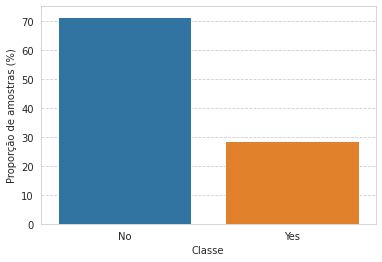

In [ ]:
sns.barplot(data=df_class_count, x=df_class_count["class"], y=df_class_count["count"])
plt.ylabel("Proporção de amostras (%)")
plt.xlabel("Classe")

Com base nos resultados acima, os dados estão desbalanceados. Por isso, os dados serão relabanceados.

#Feature encoding


In [ ]:
df = df.reset_index(drop=True)

In [ ]:
ohe = OneHotEncoder(sparse=True)

In [ ]:
df = pd.concat([df,pd.DataFrame(ohe.fit_transform(df["Gender"].values.reshape(-1,1)).toarray(), columns=["gender_f", "gender_m"])], axis=1)

In [ ]:
df.drop("Gender", axis=1, inplace=True)

#Label encoding

In [ ]:
le = LabelEncoder()

In [ ]:
df["No-show"].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df["No-show"] = le.fit_transform(df["No-show"])

In [ ]:
df.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,daysUntilAppointment,weekday,gender_f,gender_m
0,76,0,1,0,0,0,0,0,1,4,1.0,0.0
1,23,0,0,0,0,0,0,1,1,4,1.0,0.0
2,39,0,0,0,0,0,0,1,1,4,1.0,0.0
3,19,0,0,0,0,0,0,0,1,4,1.0,0.0
4,30,0,0,0,0,0,0,0,1,4,1.0,0.0


#Normaliza os valores

In [ ]:
scaler = MinMaxScaler(feature_range=[0,1])

In [ ]:
X = df.drop("No-show", axis=1)
y = df["No-show"]

In [ ]:
X = scaler.fit_transform(X)

#Reamostragem dos dados

In [ ]:
smote = SMOTE()

In [ ]:
X_resampled, y_resampled = smote.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_resampled.shape

(99784, 11)

In [ ]:
y_resampled.shape

(99784,)

#Construção dos classificadores

In [ ]:
rfc = RandomForestClassifier()
svm = SVC()
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
classifiers = [rfc, svm, knn]

#Avaliação dos classificadores

In [ ]:
df_results = pd.DataFrame()
for clf, clf_name in zip(classifiers, ["Random Forest", "SVM", "k-NN"]):
  clf_results = cross_validate(clf, X_resampled, y_resampled, cv=10, scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"])
  df_temp = pd.DataFrame({"metric":list({x:np.mean(clf_results[x]) for x in clf_results}.keys())[2:], "performance":list({x:np.mean(clf_results[x]) for x in clf_results}.values())[2:]})
  df_temp["classifier"] = clf_name
  df_results = pd.concat([df_results,df_temp])

In [ ]:
df_results["metric"].replace("test_accuracy", "Accuracy", inplace=True)
df_results["metric"].replace("test_precision_macro", "Precision macro", inplace=True)
df_results["metric"].replace("test_recall_macro", "Recall macro", inplace=True)
df_results["metric"].replace("test_f1_macro", "F1 macro", inplace=True)
df_results["performance"] = df_results["performance"] * 100

In [ ]:
df_results

,metric,performance,classifier
0,Accuracy,70.855553,Random Forest
1,Precision macro,71.739836,Random Forest
2,Recall macro,70.855559,Random Forest
3,F1 macro,70.354750,Random Forest
0,Accuracy,63.985372,k-NN
1,Precision macro,64.158402,k-NN
2,Recall macro,63.985388,k-NN
3,F1 macro,63.897912,k-NN


(0.0, 100.0)

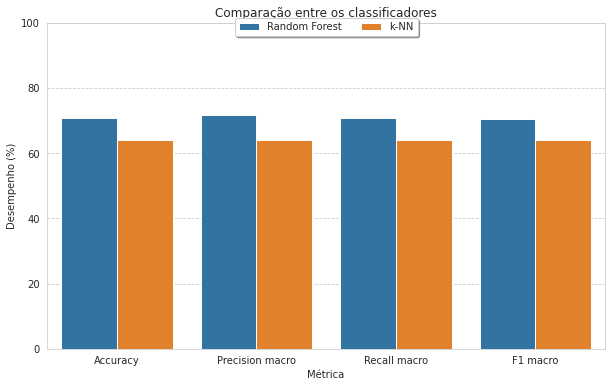

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_results, x="metric", y="performance", hue="classifier")
plt.ylabel("Desempenho (%)")
plt.xlabel("Métrica")
plt.title("Comparação entre os classificadores")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.03), ncol=3, fancybox=True, shadow=True)
plt.ylim(0, 100)

#Importância dos atributos

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_resampled, y_resampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
print(rfc.feature_importances_)

[0.48622889 0.00573877 0.00842853 0.00644397 0.00518697 0.0069432
 0.00829146 0.41503734 0.05024952 0.0037399  0.00371146]


In [ ]:
df_feature_importance = pd.DataFrame({"feature_importance":rfc.feature_importances_*100, "Columns":df.columns.drop("No-show")})

(0.0, 100.0)

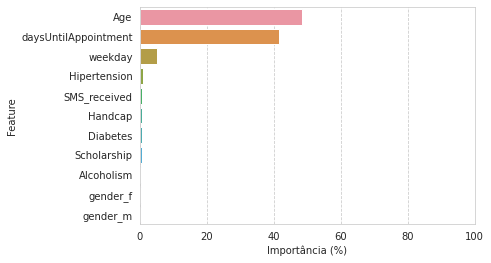

In [ ]:
sns.barplot(data=df_feature_importance.sort_values(by="feature_importance", ascending=False), y="Columns", x="feature_importance")
plt.ylabel("Feature")
plt.xlabel("Importância (%)")
plt.xlim(0, 100)

#Refaz o estudo.

Com base no gráfico acima, somente os atributos "Age", "daysUntilAppointment" e "weekday" parecem relevantes.

In [ ]:
X_selected = df[["Age", "daysUntilAppointment", "weekday"]]
y_selected = df["No-show"]

In [ ]:
X_selected, y_selected = smote.fit_resample(X_selected, y_selected)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Constrói um dataframe com os resultados para as métricas, acurácia, precisão, revocação e F1-score para os algoritmos Random Forest, SVM e k-NN. Os tempos de treino e teste são descartados. Por fim, os resultados são colocados em porcentagem.  

In [ ]:
df_selected_results = pd.DataFrame()
for clf, clf_name in zip(classifiers, ["Random Forest", "SVM", "k-NN"]):
  clf_selected_results = cross_validate(clf, X_selected, y_selected, cv=10, scoring=["accuracy", "precision_macro", "recall_macro", "f1_macro"])
  df_temp = pd.DataFrame({"metric":list({x:np.mean(clf_selected_results[x]) for x in clf_selected_results}.keys())[2:], "performance":list({x:np.mean(clf_selected_results[x]) for x in clf_selected_results}.values())[2:]})
  df_temp["classifier"] = clf_name
  df_selected_results = pd.concat([df_selected_results,df_temp])
df_selected_results["performance"] = df_selected_results["performance"] * 100  

In [ ]:
df_selected_results["metric"].replace("test_accuracy", "Accuracy", inplace=True)
df_selected_results["metric"].replace("test_precision_macro", "Precision macro", inplace=True)
df_selected_results["metric"].replace("test_recall_macro", "Recall macro", inplace=True)
df_selected_results["metric"].replace("test_f1_macro", "F1 macro", inplace=True)

In [ ]:
df_selected_results

,metric,performance,classifier
0,Accuracy,63.861089,Random Forest
1,Precision macro,64.148149,Random Forest
2,Recall macro,63.861097,Random Forest
3,F1 macro,63.715170,Random Forest
0,Accuracy,61.179255,SVM
1,Precision macro,61.358879,SVM
2,Recall macro,61.179250,SVM
3,F1 macro,61.050935,SVM


#Comparação dos classificadores

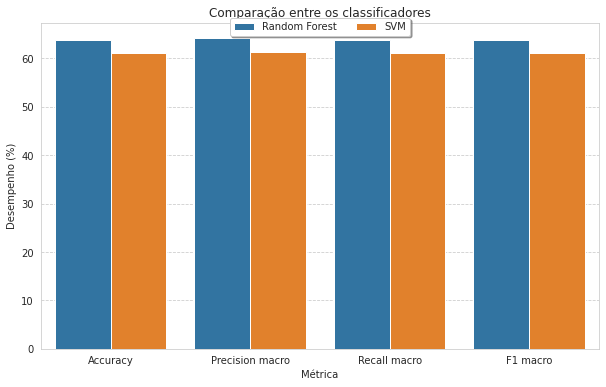

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_selected_results, x="metric", y="performance", hue="classifier")
plt.ylabel("Desempenho (%)")
plt.xlabel("Métrica")
plt.title("Comparação entre os classificadores")
plt.legend(loc="upper center", bbox_to_anchor=(0.5,1.03), ncol=3, fancybox=True, shadow=True)

#Conclusão

Os dados foram analisados e a importância dos atributos foi investigada. Valores incorretos e atributos irrelevantes foram descartados a fim de limpar os dados. As features categóricas foram convertidas para valores numéricos. Três modelos foram desenvolvidos e avaliados através de múltiplas métricas, com base em dois conjuntos de atributos. Por fim, os classificadores construídos foram comparados entre si. Infelizmente, os modelos criados alcançaram um desempenho aquém do desejado. Ademais, ao selecionar somente os atributos mais relevantes, de acordo com o Random Forest, ocorreu um declínio no desempenho dos modelos.